<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,60.009327,0.045862,70.055189,70.019830,0.035359
1,0.0,1.0,48.879757,0.066974,58.946731,58.890293,0.056438
2,0.0,2.0,85.431484,-0.030407,95.401077,95.441913,-0.040836
3,0.0,3.0,35.551891,-0.169793,45.382097,45.562465,-0.180368
4,0.0,4.0,67.168380,0.209411,77.377792,77.178863,0.198929
...,...,...,...,...,...,...,...
29995,999.0,25.0,36.135098,0.017878,46.152976,46.109646,0.043330
29996,999.0,26.0,28.107135,0.020659,38.127794,38.073305,0.054488
29997,999.0,27.0,28.825957,-0.130510,38.695447,38.792877,-0.097431
29998,999.0,28.0,98.663027,-0.049750,108.613277,108.702828,-0.089550


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    60.009327  0.045862   70.055189   70.019830  0.035359
      1.0    48.879757  0.066974   58.946731   58.890293  0.056438
      2.0    85.431484 -0.030407   95.401077   95.441913 -0.040836
      3.0    35.551891 -0.169793   45.382097   45.562465 -0.180368
      4.0    67.168380  0.209411   77.377792   77.178863  0.198929
...                ...       ...         ...         ...       ...
999.0 25.0   36.135098  0.017878   46.152976   46.109646  0.043330
      26.0   28.107135  0.020659   38.127794   38.073305  0.054488
      27.0   28.825957 -0.130510   38.695447   38.792877 -0.097431
      28.0   98.663027 -0.049750  108.613277  108.702828 -0.089550
      29.0   59.751163 -0.015564   69.735599   69.750356 -0.014757

[30000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    60.009327  0.045862   70.055189   70.019830  0.035359
      1.0    48.879757  0.066974   58.946731   58.890293  0.056438
      2.0    85.431484 -0.030407   95.401077   95.441913 -0.040836
      3.0    35.551891 -0.169793   45.382097   45.562465 -0.180368
      4.0    67.168380  0.209411   77.377792   77.178863  0.198929
...                ...       ...         ...         ...       ...
999.0 25.0   36.135098  0.017878   46.152976   46.109646  0.043330
      26.0   28.107135  0.020659   38.127794   38.073305  0.054488
      27.0   28.825957 -0.130510   38.695447   38.792877 -0.097431
      28.0   98.663027 -0.049750  108.613277  108.702828 -0.089550
      29.0   59.751163 -0.015564   69.735599   69.750356 -0.014757

[30000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,60.009327,0.045862,70.055189,70.019830,0.035359
1,0.0,1.0,48.879757,0.066974,58.946731,58.890293,0.056438
2,0.0,2.0,85.431484,-0.030407,95.401077,95.441913,-0.040836
3,0.0,3.0,35.551891,-0.169793,45.382097,45.562465,-0.180368
4,0.0,4.0,67.168380,0.209411,77.377792,77.178863,0.198929
...,...,...,...,...,...,...,...
29995,999.0,25.0,36.135098,0.017878,46.152976,46.109646,0.043330
29996,999.0,26.0,28.107135,0.020659,38.127794,38.073305,0.054488
29997,999.0,27.0,28.825957,-0.130510,38.695447,38.792877,-0.097431
29998,999.0,28.0,98.663027,-0.049750,108.613277,108.702828,-0.089550


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    60.009327  0.045862   70.055189   70.019830  0.035359
      1.0    48.879757  0.066974   58.946731   58.890293  0.056438
      2.0    85.431484 -0.030407   95.401077   95.441913 -0.040836
      3.0    35.551891 -0.169793   45.382097   45.562465 -0.180368
      4.0    67.168380  0.209411   77.377792   77.178863  0.198929
...                ...       ...         ...         ...       ...
999.0 25.0   36.135098  0.017878   46.152976   46.109646  0.043330
      26.0   28.107135  0.020659   38.127794   38.073305  0.054488
      27.0   28.825957 -0.130510   38.695447   38.792877 -0.097431
      28.0   98.663027 -0.049750  108.613277  108.702828 -0.089550
      29.0   59.751163 -0.015564   69.735599   69.750356 -0.014757

[30000 rows x 5 columns]

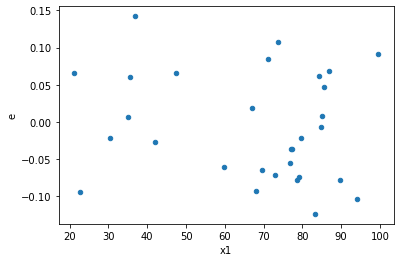

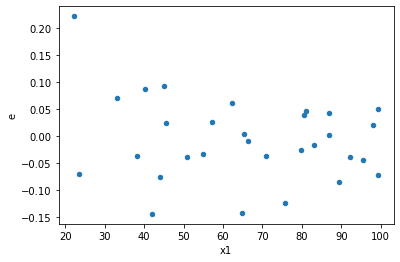

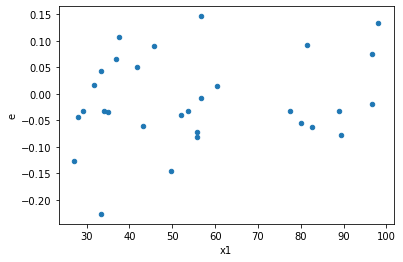

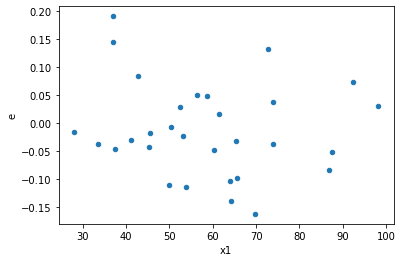

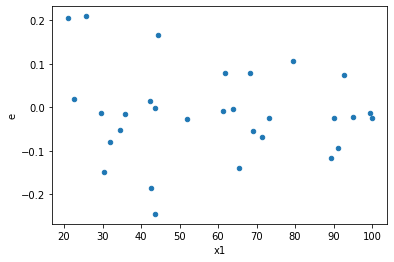

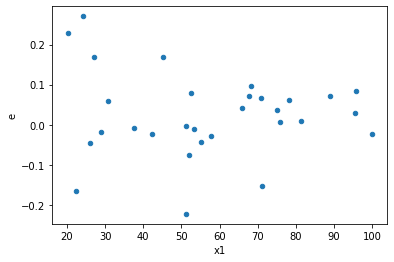

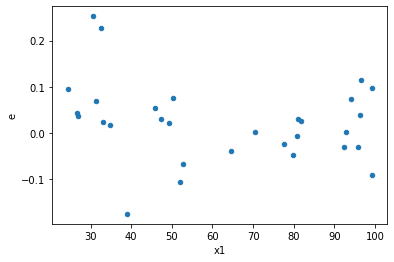

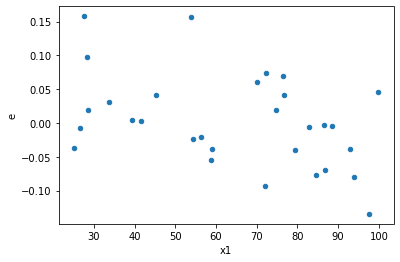

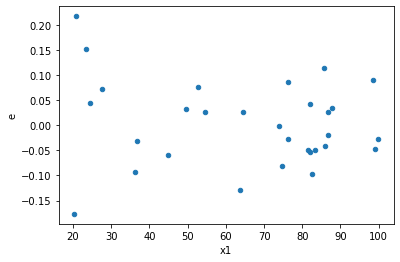

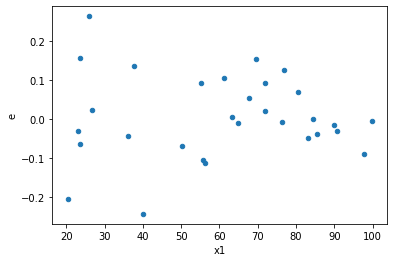

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,8.0,0.10148008357113515,0.256939551251356,0.005074004178556758,0.0321174439064195,6.329802415644627,0.011556089830218719,0.9942219550848906,0.005778044915109359,Reject005=0 : Heteroscedasticity
3.0,14.0,14.0,0.04075415370127745,0.1749772203553509,0.0029110109786626747,0.012498372882525064,4.293481877648859,0.010064173622946093,0.994967913188527,0.005032086811473047,Reject005=0 : Heteroscedasticity
4.0,16.0,12.0,0.10300508172895816,0.17047070611553586,0.006437817608059885,0.014205892176294655,2.206631663268847,0.17046149635582064,0.9147692518220897,0.08523074817791032,Reject005=1 : Homoscedasticity
8.0,18.0,10.0,0.07551986831577505,0.09103469103153317,0.004195548239765281,0.009103469103153317,2.169792499790828,0.2118089005923045,0.8940955497038477,0.10590445029615225,Reject005=1 : Homoscedasticity
9.0,16.0,12.0,0.05297769853330886,0.10743548975609979,0.0033111061583318037,0.008952957479674983,2.703917377323126,0.08720612556216811,0.9563969372189159,0.04360306278108406,Reject005=1 : Homoscedasticity
12.0,8.0,20.0,0.03775812660334775,0.151715525528334,0.004719765825418469,0.0075857762764167,1.6072357309685215,0.37023630059347923,0.8148818497032604,0.18511815029673961,Reject005=1 : Homoscedasticity
13.0,14.0,14.0,0.09012464669699802,0.09349471669467219,0.006437474764071287,0.0066781940496194415,1.037393433663096,0.9462122618707598,0.5268938690646201,0.4731061309353799,Reject005=1 : Homoscedasticity
16.0,14.0,14.0,0.04010262730797825,0.13218372226219435,0.0028644733791413036,0.009441694447299597,3.296136216888138,0.0329375946683077,0.9835312026658461,0.01646879733415385,Reject005=0 : Heteroscedasticity
17.0,15.0,13.0,0.04958269661717821,0.056240392151929136,0.0033055131078118805,0.004326184011686857,1.3087783562143005,0.6325908801038791,0.6837045599480605,0.31629544005193955,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,8.0,0.10148008357113515,0.256939551251356,0.005074004178556758,0.0321174439064195,6.329802415644627,0.011556089830218719,Reject005=0 : Heteroscedasticity
1.0,14.0,14.0,0.1256747496122765,0.09123387295972557,0.008976767829448323,0.0065167052114089696,0.7259522954387762,0.556969342050809,Reject005=1 : Homoscedasticity
2.0,14.0,14.0,0.10493191419256169,0.030618255936751205,0.007495136728040121,0.0021870182811965146,0.2917916457767397,0.027894206718122684,Reject005=0 : Heteroscedasticity
3.0,14.0,14.0,0.04075415370127745,0.1749772203553509,0.0029110109786626747,0.012498372882525064,4.293481877648859,0.010064173622946093,Reject005=0 : Heteroscedasticity
4.0,16.0,12.0,0.10300508172895816,0.17047070611553586,0.006437817608059885,0.014205892176294655,2.206631663268847,0.17046149635582064,Reject005=1 : Homoscedasticity
5.0,14.0,14.0,0.25862051987701484,0.06393930324773844,0.018472894276929632,0.0045670930891241746,0.24723213485977186,0.01330571311894772,Reject005=0 : Heteroscedasticity
6.0,15.0,13.0,0.1358828231568749,0.09665525672061753,0.009058854877124992,0.00743501974773981,0.8207460930315137,0.707265823819628,Reject005=1 : Homoscedasticity
7.0,15.0,13.0,0.19233281051906415,0.038276852830075016,0.01282218736793761,0.002944373294621155,0.2296311237803058,0.008186564484424466,Reject005=0 : Heteroscedasticity
8.0,18.0,10.0,0.07551986831577505,0.09103469103153317,0.004195548239765281,0.009103469103153317,2.169792499790828,0.2118089005923045,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      590
Reject005=0 : Heteroscedasticity    410
Name: Result_test, dtype: int64